# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


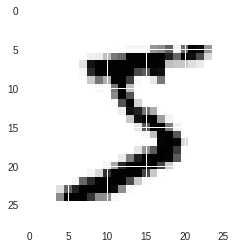

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#Trying max pooling instead of convolutions to reduce param size with Total params: 14,832
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(13,13,1)))

# Convolutions that helped reduce params to 19,708
"""model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(26,26,32)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(24,24,16)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(22,22,8)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(20,20,8)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(18,18,8)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(16,16,8)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(14,14,8)))
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(12,12,8)))"""
          
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(13, 13, 1...)`
  if __name__ == '__main__':


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 8)         2312      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 10)        90        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) #changing epoch form 10 to 1 for testing

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.2102 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0679 - acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0519 - acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0438 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0363 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0319 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0293 - acc: 0.9906
Epoch 8/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0244 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0223 - acc: 0.9928
Epoch 10/10
60000/60000 [==============================] - 14s 240us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.05293777798583469, 0.9867]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[1.8244606e-13 9.4998393e-12 1.3334578e-09 7.1646321e-07 1.9657005e-16
  7.7119469e-13 7.7624589e-25 9.9999928e-01 8.0325288e-11 1.7445224e-09]
 [1.9367213e-13 1.4064885e-09 1.0000000e+00 5.4384904e-13 3.2703542e-15
  3.2387952e-15 7.4206269e-10 6.9195306e-17 3.2032595e-12 4.5413184e-16]
 [3.7233598e-09 9.9995291e-01 1.5260595e-06 1.3790000e-07 5.9992872e-06
  8.3851540e-07 2.3889189e-07 3.2495229e-06 3.5068420e-05 1.2944274e-08]
 [1.0000000e+00 3.0125819e-17 1.3930451e-10 6.0805531e-15 5.7998148e-11
  8.2135398e-10 2.4496059e-08 1.8012917e-09 9.6998097e-11 1.0795357e-10]
 [1.1469115e-13 1.3240268e-15 1.9257768e-10 1.0424564e-12 1.0000000e+00
  7.1183853e-15 3.1883103e-14 2.5492854e-09 1.4960279e-10 3.9425053e-08]
 [1.7653966e-09 9.9991381e-01 3.5335879e-07 4.4618704e-09 1.4774771e-05
  2.1892241e-09 4.1330384e-09 5.5560773e-05 1.5467253e-05 1.0876319e-08]
 [2.0985193e-15 2.0053472e-09 2.7577197e-08 2.0281537e-13 9.9979228e-01
  7.8120149e-10 1.0604235e-11 2.8607229e-07 1.7878175e-04 

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print (layer_dict)

{'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f2a84dadf60>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f2a84dcb208>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f2a84dadf98>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7f2a84d69240>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7f2a84dcbba8>, 'flatten_2': <keras.layers.core.Flatten object at 0x7f2a84ddda20>, 'activation_2': <keras.layers.core.Activation object at 0x7f2a84dddf98>}


IndexError: ignored

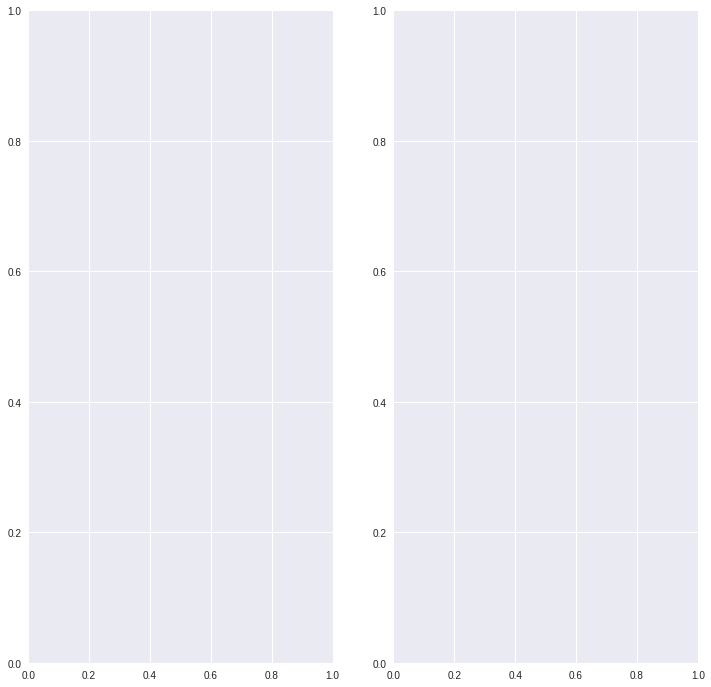

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()